In [ ]:
%load_ext autoreload 
%autoreload 2 


In [9]:

from pathlib import Path
import torch
from src.diffusion import ImgToImgModel
from src.data import img_float_to_img, read_image, save_image
from src.utils import show_img


In [4]:
img_float_to_img(torch.rand(10, 10))

tensor([[133, 207, 251, 249,  43,  42, 178,  77,  40, 203],
        [141,  40, 128, 222, 225, 120,  85, 192, 213,  94],
        [ 82, 150, 124, 238,  65, 187, 120,  91, 180, 152],
        [ 76, 100, 108, 136,  97, 109,   4,  49,   7,  61],
        [228,  62, 119, 204, 114, 108, 158, 182,   7,  71],
        [104,  45, 131,  86, 168, 215,  97, 161,  78, 198],
        [ 88, 130,  78, 243,  85, 124, 125, 145, 250,  20],
        [143, 149, 184, 140, 108,   6, 224,  91,  97, 203],
        [ 82, 244,  28, 246, 231,  77, 217,  64, 213, 187],
        [129, 241,  77, 216, 144,  22, 156, 206, 236,  68]], dtype=torch.uint8)

In [11]:
model = ImgToImgModel.load_model()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

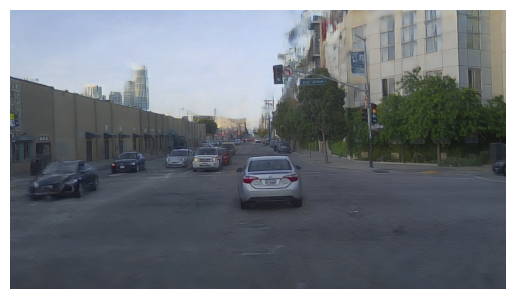

In [8]:
ex_img = read_image(Path("reference/pandaset-01/renders/4m/01.jpg"))
show_img(ex_img)

In [28]:
diffused_img = model.img_to_img(ex_img, base_denoising_start = None, base_denoising_end = None)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['0']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['0']


  0%|          | 0/10 [00:00<?, ?it/s]

In [30]:
dimg = diffused_img["image"]
dimg.max(), dimg.min()

(tensor(0.9536, device='cuda:0'), tensor(0.0773, device='cuda:0'))

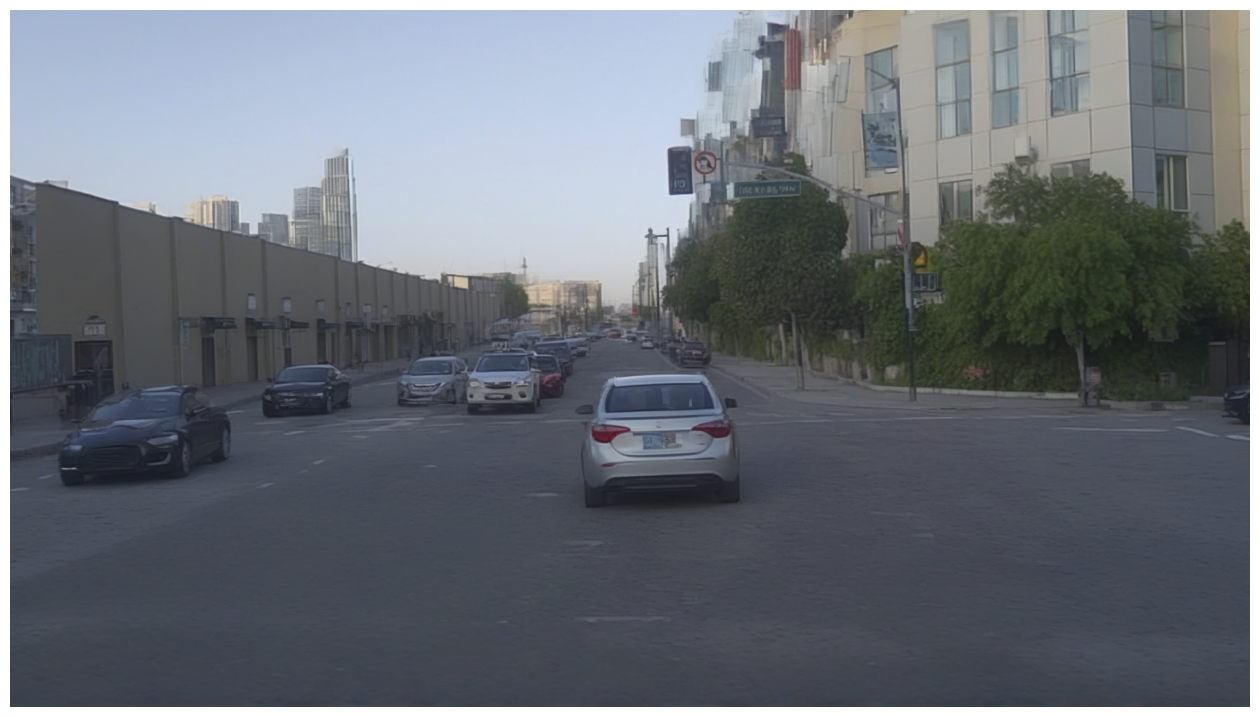

In [31]:
show_img(dimg)

In [15]:
diffused_img["image"].shape

torch.Size([1, 3, 1080, 1920])

In [17]:
save_image("ex-img.jpg", diffused_img["image"])

RuntimeError: Input tensor dtype should be uint8

In [1]:
import torch

In [178]:
def draw_from_bins(start, end, n_draws, include_last: bool = False):
    values = torch.zeros(n_draws+int(include_last), dtype=torch.long)
    buckets = torch.round(torch.linspace(start, end, n_draws+1)).int()

    for i in range(n_draws):
        values[i] = torch.randint(buckets[i], buckets[i+1], (1,))

    if include_last:
        values[-1] = end
        
    return values

In [186]:
draw_from_bins(0, 10, 4, True)

0
2
5
8


tensor([ 0,  4,  6,  8, 10])